# Predicting Weight/Height and Housing Prices

Date April 21, 2018

The following examines if a predictive, functional, linear relationship exists between weight and height, and housing prices through respective datasets via a statistical tool known as regression, a statistical technique for predicting a continuous variable, a “line of best fit” through the data while minimizing errors of prediction. 

A regression between two variables is a Simple Linear Regression; with more variables, the model is called Multiple Linear Regression or multivariate.

The best fit line can be estimated mathematically through the classic y=mx+b linear function where y is the predicted variable, x the independent variable, a bias called b and m the +/- slope of the line. The errors mathematically can be represented as the average of the squares of the distances between x and predicted y on the best fit line, called RMSE or root mean squared error.

See metrics to measure performance of tasks in regression --> https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/metrics/regression.py#L183

More on RMSE --> https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
Read more --> https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Weight - Height dataset

In [70]:
df = pd.read_csv('weight-height.csv')

In [71]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### Visualize the dataset

In [73]:
df['Height'].values
#type(df['Height']).values

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [74]:
df[['Height']].values
#type(df[['Height']].values)

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

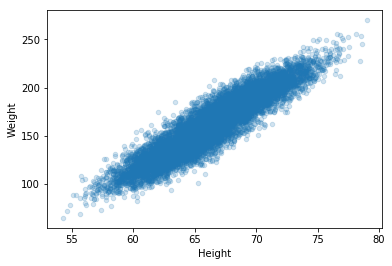

In [75]:
#alternative way - per documentation - Each plot kind has a corresponding method on the DataFrame.plot accessor
df.plot.scatter('Height','Weight', alpha = 0.2)

Text(0,0.5,'Weight (lbs)')

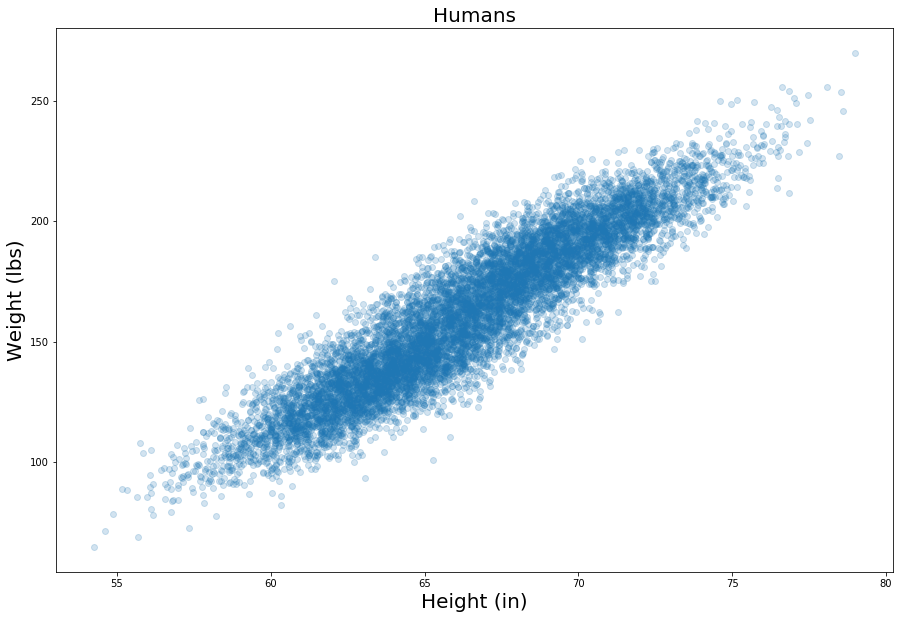

In [76]:
plt.figure(figsize=(15,10))
plt.scatter(df['Height'], df['Weight'], alpha = 0.2)
plt.title('Humans', size=20)
plt.xlabel('Height (in)', size=20)
plt.ylabel('Weight (lbs)', size=20)

## Visualize male and female populations

This could be done in many ways, below are two examples.

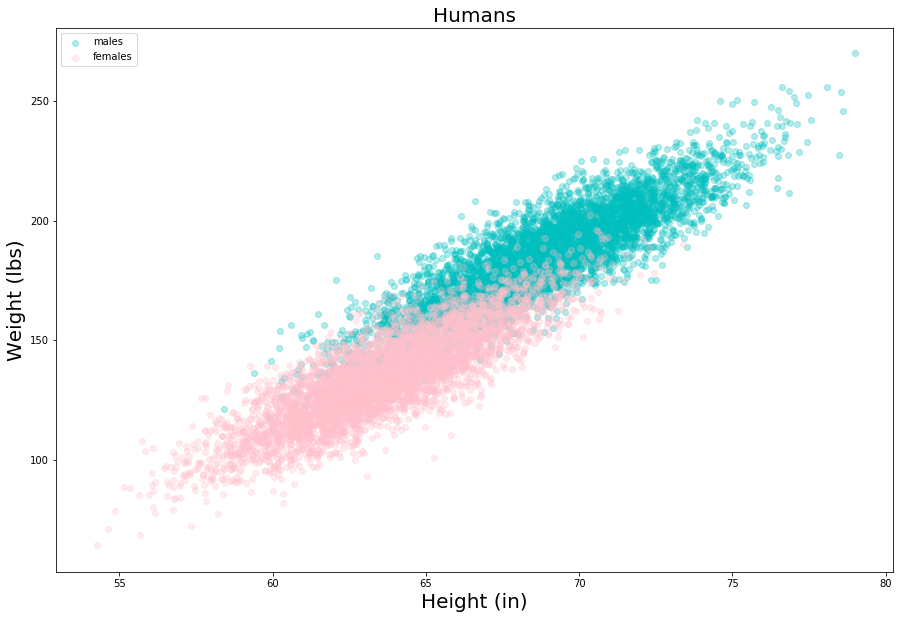

In [77]:
# males = df[df['Gender'] == 'Male']
# females = df[df['Gender'] == 'Female']

males = df.query('Gender == "Male"')
females = df.query('Gender == "Female"')

plt.figure(figsize=(15,10))
plt.scatter(males['Height'], males['Weight'], alpha = 0.3, label = 'males', c = 'c')
plt.scatter(females['Height'], females['Weight'], alpha = 0.3, label = 'females', c = 'pink')
plt.title('Humans', size = 20)
plt.xlabel('Height (in)', size = 20)
plt.ylabel('Weight (lbs)', size = 20)
plt.legend()

## Linear regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
x = df[['Height']].values
y = df['Weight']
n_data = len(y)
n_data
ind = np.arange(n_data)
ind

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [80]:
# create instance of linear regression class
regr = LinearRegression()

# what's the purpose of the next line?
# try to print out df['Height'].values and x
# to figure it out
x = df[['Height']].values

y = df['Weight']

# split data in 2 parts (20% test / 80% train)
n_data = len(y)
ind = np.arange(n_data)
np.random.shuffle(ind)
split_point = n_data // 5
test_ind = ind[:split_point]
train_ind = ind[split_point:]

x_train = x[train_ind]
x_test  = x[test_ind]
y_train = y[train_ind]
y_test  = y[test_ind]


regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# The coefficients
print("Slope: %.2f" % regr.coef_)
print("Intercept: %.2f" % regr.intercept_)

Slope: 7.71
Intercept: -350.37


In [82]:
# The mean square error or MSE
# average of the square of the distances to the best fit line through the data points
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

Residual sum of squares: 148.51


In [83]:
# Explained variance score: 1 is perfect prediction 
# or the R-squared - the proportion of the variance in the dependent variable that is predictable 
# from the independent variable
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.86


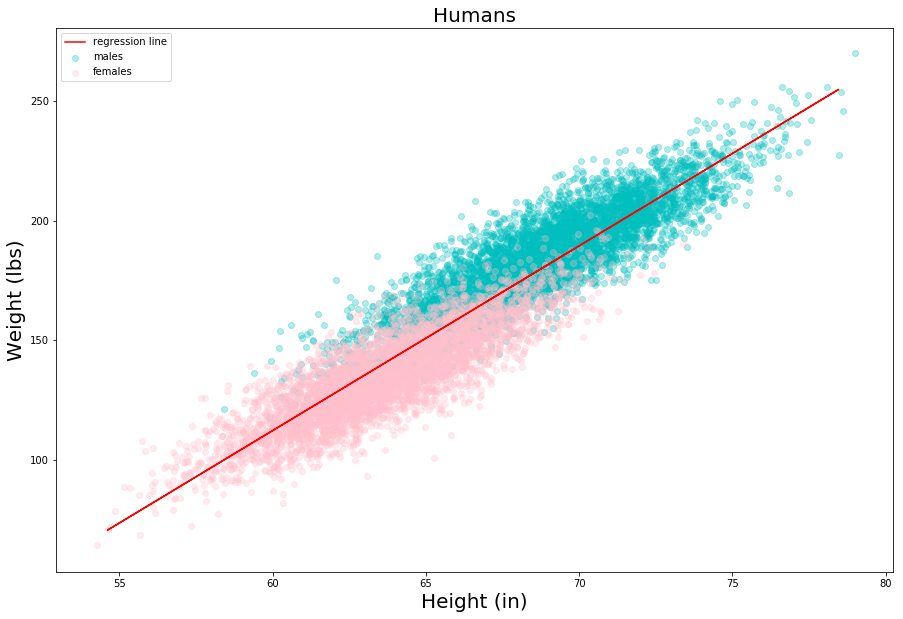

In [84]:
# males = df[df['Gender'] == 'Male']
# females = df[df['Gender'] == 'Female']

males = df.query('Gender == "Male"')
females = df.query('Gender == "Female"')

plt.figure(figsize=(15,10))
plt.scatter(males['Height'], males['Weight'], alpha = 0.3, label = 'males', c = 'c')
plt.scatter(females['Height'], females['Weight'], alpha = 0.3, label = 'females', c = 'pink')
plt.title('Humans', size = 20)
plt.xlabel('Height (in)', size = 20)
plt.ylabel('Weight (lbs)', size = 20)
plt.plot(x_test, regr.predict(x_test), label = "regression line", color = 'red')
plt.legend()

## Multi-regression

Can linear regression be extended to a dataset with more than one feature?  Try the same exercise as above but using housing data. The steps:

- Load the dataset "housing-data.csv"
- Plot the histograms for each feature using `pandas.plotting.scatter_matrix`
- Create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- Create a linear regression model
- Split the data into train and test with a 20% test size
- Train the model on the training set and check its R2 coefficient on training and test set
- What does the model say?

This dataset contains multiple columns:
- sqft
- bdrms
- age
- price


In [85]:
# read the data and build the matrices
import pandas as pd
hd = pd.read_csv("housing-data.csv")

#X = hd[['sqft','bdrms','age']].values => alternative
#note use of as_matrix for multiple features
X = hd.as_matrix(columns=['sqft','bdrms','age'])
Y = hd['price']

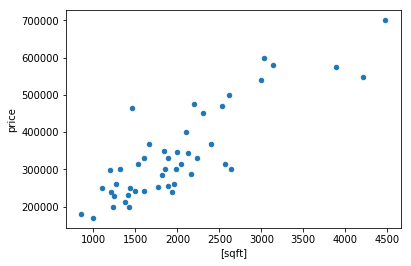

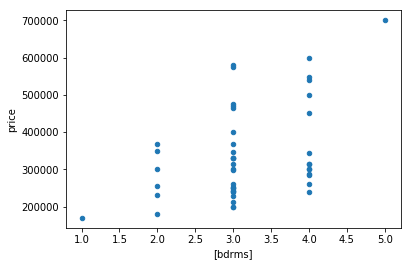

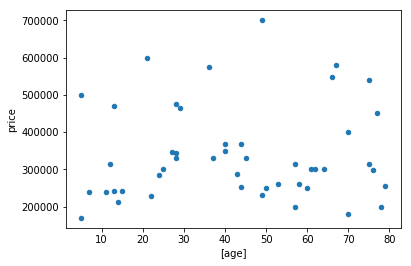

In [86]:

hd.plot.scatter(['sqft'],'price')
hd.plot.scatter(['bdrms'],'price')
hd.plot.scatter(['age'],'price')




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16b71b00>,
      dtype=object)

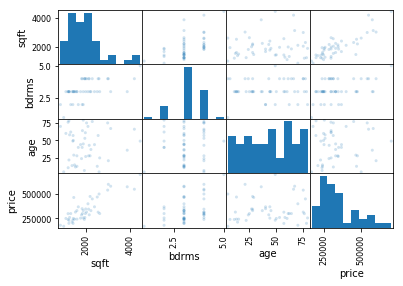

In [87]:
from pandas.plotting import scatter_matrix as sxm
sxm(hd, alpha=0.2)

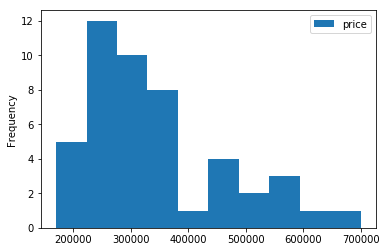

In [88]:
# plot can also be called as a method of a dataframe with a parameter called 'kind' to describe the type of plot to draw
hd.plot(kind='hist',x='sqft',y='price')

In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [90]:
regr=LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
regr.coef_


array([  139.33484671, -8621.47045953,   -81.21787764])

In [92]:
regr.intercept_

92451.62784164582

In [93]:
# Explained variance score: 1 is perfect prediction 
# or the R-squared - the proportion of the variance in the dependent variable that is predictable 
# from the independent variable
print('Variance score: %.2f' % regr.score(X, Y))

Variance score: 0.73


In [94]:
# create the train/test models for linear regression
# train test split based on length of Y
n_data = len(Y)
ind = np.arange(n_data)
np.random.shuffle(ind)
split_point = n_data // 5
test_ind = ind[:split_point]
train_ind = ind[split_point:]

x_train = X[train_ind]
x_test  = X[test_ind]
y_train = Y[train_ind]
y_test  = Y[test_ind]


regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
regr.coef_

array([   143.10929046, -17660.50474476,   -485.83394537])

In [96]:
regr.intercept_

136839.36222533046

In [97]:
# The coefficients
#print("Slope: %0.2f" % i for i in regr.coef_)
for i in regr.coef_:
    print("Slope: %0.2f" %i) 
print("Intercept: %0.2f" % regr.intercept_)

Slope: 143.11
Slope: -17660.50
Slope: -485.83
Intercept: 136839.36


In [98]:
# The mean square error or MSE
# average of the square of the distances to the best fit line through the data points
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Residual sum of squares: 4162742526.44


In [99]:
regr.score(x_train, y_train)

0.7472752765473766

In [100]:
regr.fit(x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
regr.coef_

array([  118.56830063, -1420.91395834,   639.66828823])

In [102]:
regr.intercept_

67902.73027377122

In [103]:
np.mean((regr.predict(x_test) - y_test) ** 2)

2521722519.054496

In [104]:
# Explained variance score: 1 is perfect prediction 
# or the R-squared - the proportion of the variance in the dependent variable that is predictable 
# from the independent variable
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.66


## ML trying a train test split 

- Split the housing dataset into training and test sets using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a test size of 30% and a random_state=42
- Train the previous model on the training set and check the R2 score on the test set
- Train a regularized regression model like [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) or [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) on the training dataset and test the score on the test set
- Does regularization improve the score?
- Try changing the regularization strength alpha

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [106]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

LR = LinearRegression()
LR.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
LR.score(X_train,Y_train)

0.7669707752603895

In [109]:
LR.score(X_test,Y_test)

0.5895953393657789

In [110]:
LS=Lasso()
LS.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
LS.score(X_train,Y_train)

0.7669707750614001

In [112]:
# Explained variance score: 1 is perfect prediction 
# or the R-squared - the proportion of the variance in the dependent variable that is predictable 
# from the independent variable
print('Lasso variance score: %.2f' % LS.score(X_test, Y_test))

Lasso variance score: 0.59


In [113]:
LS.coef_

array([  131.24829709, -2753.7448328 ,   -66.79575992])

In [114]:
LS.intercept_

72056.72109002265

In [115]:
RG=Ridge()
RG.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
RG.score(X_train,Y_train)

0.7669695053525161

In [117]:
# Explained variance score: 1 is perfect prediction 
# or the R-squared - the proportion of the variance in the dependent variable that is predictable 
# from the independent variable
print('Ridge Variance score: %.2f' % RG.score(X_test, Y_test))


Ridge Variance score: 0.59


In [118]:
RG.coef_

array([  131.1141446 , -2557.06804484,   -66.94709134])

In [119]:
RG.intercept_

71696.13212331745

# Conclusions
Strong linear relationships can be found between the composite dependent housing features age, bedrooms, square footage and home prices, based on the data and several regression calculation variations.